## Week 18 - Intro to Neural Networks

### 1.	What is a neural network? What are the general steps required to build a neural network? 

Neural networks - process that mimics the human brain to understand patterns in data. These were inspired by biological neural networks. Neural networks learn to perform tasks by being exposed to various datasets and examples without any task-specific rules. These networks learn via supervised learning.

- 1. Prepare the data set (source of information for the problem)
- 2. Choose a correct neural network architecture
- 3. Set the training strategy
- 4. Set the model selection
- 5. Evaluate the model
- 6. Deploy the model (make predictions)

### 2.	Generally, how do you check the performance of a neural network? Why? 


In order to check the performance of a neural network, you want to evaluate the loss (alculated using the network's output predictions and the true labels for the respective input).

We want to minimize the loss function to have a better model so need to check it first.

### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 
Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("arrhythmia_csv.csv")
df.head()

age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
0   75    0     190      80           91         193          371        174   
1   56    1     165      64           81         174          401        149   
2   54    0     172      95          138         163          386        185   
3   55    0     175      94          100         202          380        179   
4   75    0     190      80           88         181          360        177   

   Pinterval  QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  chV6_SwaveAmp  \
0        121  -16  ...            0.0            9.0           -0.9   
1         39   25  ...            0.0            8.5            0.0   
2        102   96  ...            0.0            9.5           -2.4   
3        143   28  ...            0.0           12.2           -2.2   
4        103  -16  ...            0.0           13.1           -3.6   

   chV6_RPwaveAmp  chV6_SPwaveAmp  chV6_PwaveAmp  chV6_TwaveAmp  chV6_QRSA  \
0             0.0               0            0.9            2.9       23.3   
1             0.0               0            0.2            2.1       20.4   
2             0.0               0            0.3            3.4       12.3   
3             0.0               0            0.4            2.6       34.6   
4             0.0               0           -0.1            3.9       25.4   

   chV6_QRSTA  class  
0        49.4      8  
1        38.8      6  
2        49.0     10  
3        61.6      1  
4        62.8      7  

[5 rows x 280 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


Check on the number of nulls and get them taken care of using interpolate.

In [4]:
df.isna().values.sum()

408

In [5]:
df.interpolate (method='polynomial', order=1, axis=0, limit_area='inside', inplace=True)

In [6]:
df.isna().values.sum()

3

In [7]:
df.interpolate(method='linear', limit_direction = 'backward', inplace=True)

In [8]:
df.isna().values.sum()

1

In [9]:
df.interpolate(method='linear', limit_direction = 'forward', inplace=True)

In [10]:
df.isna().values.sum()

0

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 280 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    age                           int64  
 1    sex                           int64  
 2    height                        int64  
 3    weight                        int64  
 4    QRSduration                   int64  
 5    PRinterval                    int64  
 6    Q-Tinterval                   int64  
 7    Tinterval                     int64  
 8    Pinterval                     int64  
 9    QRS                           int64  
 10   T                             float64
 11   P                             float64
 12   QRST                          float64
 13   J                             float64
 14   heartrate                     float64
 15   chDI_Qwave                    int64  
 16   chDI_Rwave                    int64  
 17   chDI_Swave                    int64  
 18   chDI_RPw

In [12]:
df['class'].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: class, dtype: int64

The class column is the one that indicates whether there is a heart condition or not. Given that there are many different values, I'm using lambda to change the 1's to 0's (which indicate no heart issue), and everything else to 1's (to indicate a heart issue).

In [13]:
df['class'] = df['class'].apply(lambda x: 0 if x==1 else 1)

In [14]:
df['class'].value_counts()

0    245
1    207
Name: class, dtype: int64

#### Now begin with keras to predict outcomes

In [15]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1).values
y = df['class'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

n_cols = X_train.shape[1]

In [16]:
import tensorflow as tf
tf.random.set_seed(42)

from keras.optimizers import gradient_descent_v2 

# define the keras model
model = Sequential()
model.add(Dense(500, activation='relu', input_shape = (n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# compile the keras model
#optim = gradient_descent_v2.SGD(learning_rate=0.01)
#model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [17]:
model.fit(X_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_data = (X_test, y_test))
#model.fit(X_train, y_train, validation_data = (X_test, y_test))
#model.fit(X_train, y_train, batch_size = 128, verbose = 1)

Epoch 1/20
3/3 [==============================] - 1s 61ms/step - loss: 2.0670 - accuracy: 0.5538 - val_loss: 0.8297 - val_accuracy: 0.6912
Epoch 2/20
3/3 [==============================] - 0s 13ms/step - loss: 0.7095 - accuracy: 0.6994 - val_loss: 0.5578 - val_accuracy: 0.6985
Epoch 3/20
3/3 [==============================] - 0s 12ms/step - loss: 0.5170 - accuracy: 0.7089 - val_loss: 0.4947 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 0s 13ms/step - loss: 0.4521 - accuracy: 0.8101 - val_loss: 0.8700 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 0.3377 - accuracy: 0.8797 - val_loss: 0.4942 - val_accuracy: 0.7794
Epoch 6/20
3/3 [==============================] - 0s 12ms/step - loss: 0.2777 - accuracy: 0.8513 - val_loss: 0.6992 - val_accuracy: 0.7574
Epoch 7/20
3/3 [==============================] - 0s 11ms/step - loss: 0.1999 - accuracy: 0.9114 - val_loss: 1.0012 - val_accuracy: 0.7132
Epoch 8/20
3/3 [===========

In [18]:
score, acc = model.evaluate(X_test, y_test, verbose=0)

In [19]:
print('score', score)
print('accuracy', acc)

score 2.6131432056427
accuracy 0.7867646813392639


### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.


Using KNN, predict accuracy.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X = df.drop('class', axis=1).values
y = df['class'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
def kfunc():
    ### find the best k value ###
    #initialize k prior to while loop
    k=1
    
    #set score1 and k1 to 0 - they will be used to hold maximum value
    score1 = 0
    k1 = 0
    
    #start while loop at 1 and increment by 2 (using just odd numbers)
    while (k < 40):
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = knn.score(X_test,y_test)
        
        #if saved score is lower than score just calculated, save the new one. Save the corresponding k as well
        if score1 < score:
            score1 = score
            k1 = k
        k += 2
        
    return k1,score1

kfunc()

(3, 0.6243093922651933)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#use k from above function
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=40,algorithm='kd_tree')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.6243093922651933


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.93      0.73        98
           1       0.76      0.27      0.39        83

    accuracy                           0.62       181
   macro avg       0.68      0.60      0.56       181
weighted avg       0.67      0.62      0.57       181



### 5.	Create a neural network using pytorch to predict the same result as question 3. 


Now to try the same with pytorch

In [24]:
import torch

X = df.drop('class', axis=1).values
y = df['class'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [25]:
import torch.nn as nn
import torch.nn.functional as F #where the activation functions are

#create tensors = matrices
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
#artificial neural network
class ANN_Model(nn.Module):
    def __init__(self, input_features=279,hidden1=20,hidden2=20,out_features=2):
        super().__init__() #super is a computed indirect reference. So, it isolates changes
        # and makes sure that children in the layers of multiple inheritence are calling
        #the right parents
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [27]:
torch.manual_seed(42)

#create instance of model
ann = ANN_Model()

#loss function
loss_function = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(ann.parameters(),lr=.0001) #lr is learning rate - play around with

In [28]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() 
    optimizer.step() #perform one optimization step each epoch

In [29]:
# predictions
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80        74
           1       0.77      0.71      0.74        62

    accuracy                           0.77       136
   macro avg       0.77      0.77      0.77       136
weighted avg       0.77      0.77      0.77       136



### 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?


| Model | Accuracy |
| :--- | :--- |
| keras |.79|
| pytorch |.77|
| KNN |.62|

Both keras and pytorch performed better than KNN, with kera doing the best of the 3. I tried various things to get KNN to perform better but could not find the right settings that made any difference. 

A neural network can have hidden nodes for concepts, using these inputs to make the final decision.

Whereas KNN and linear regression is based on more obvious facts, and not side effects. A neural network should be able to make more accurate predictions.

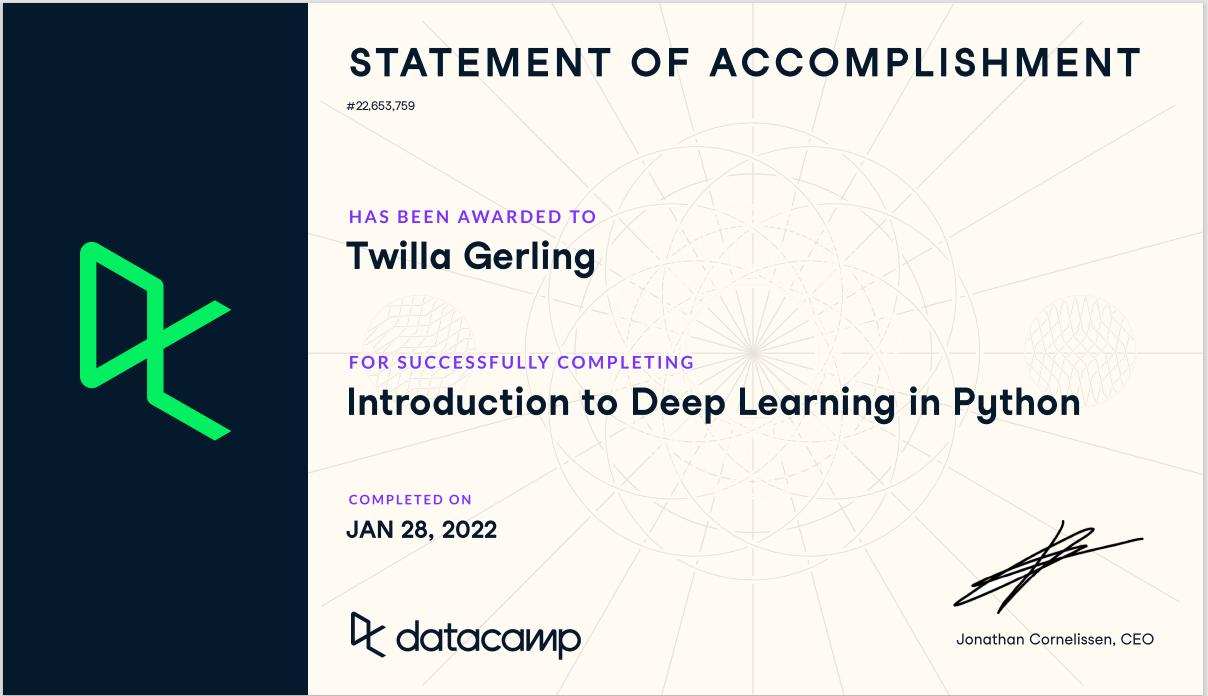